# Imports and setup

In [99]:
from matplotlib import pyplot as plt
import pandas as pd

x_label = 'Raman Shift (1/cm)'
y_label = 'Counts'

# Blank Background Subtraction

Text(0, 0.5, 'Counts')

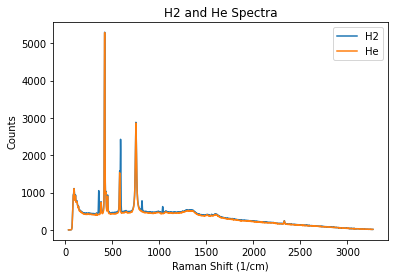

In [100]:
he_spectra = pd.read_csv('C:\\Users\\Quantum\\Desktop\\Raman Spectra\\20220519 Helium Background\\20220519_He_5,3PSIG_0,2SLM_295K_1000ms_20av_0ms_3_450mw_00000_counts.csv', header=None)
h2_spectra = pd.read_csv('C:\\Users\\Quantum\\Desktop\\Raman Spectra\\20220517 16hr H2 Bake\\20220517_1040_H2_5,19PSIG_0,26SLM_290,9K_1_00000_counts.csv', header=None)

plt.plot(h2_spectra[0], h2_spectra[1])
plt.plot(he_spectra[0],he_spectra[1])
plt.legend(['H2', 'He'])
plt.title('H2 and He Spectra')
plt.xlabel(x_label)
plt.ylabel(y_label)


Text(0, 0.5, 'Counts')

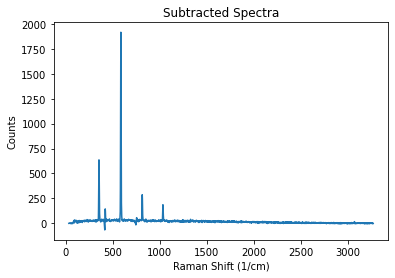

In [101]:
plt.plot(h2_spectra[0], h2_spectra[1] - he_spectra[1])
plt.title('Subtracted Spectra')
plt.xlabel(x_label)
plt.ylabel(y_label)

C:\Users\Quantum\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Quantum\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == "":


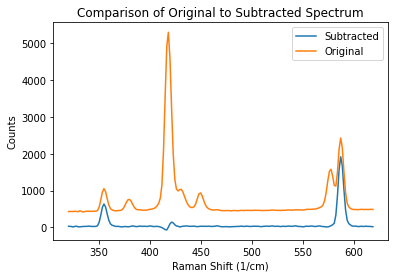

In [102]:
windowed_spectrum = h2_spectra.copy()
windowed_spectrum[1] = windowed_spectrum[1] - he_spectra[1]

low_window = windowed_spectrum[0] >= 320
high_window = windowed_spectrum[0] <= 620

windowed_spectrum = windowed_spectrum[low_window]
windowed_spectrum = windowed_spectrum[high_window]

original_windowed = h2_spectra.copy()
original_windowed = original_windowed[low_window]
original_windowed = original_windowed[high_window]

plt.plot(windowed_spectrum[0], windowed_spectrum[1])
plt.plot(original_windowed[0], original_windowed[1])
plt.title('Comparison of Original to Subtracted Spectrum')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['Subtracted', 'Original'])

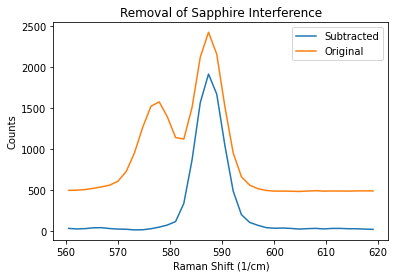

In [109]:
sapphire_window = original_windowed[0] >= 560

original_sapphire_window = original_windowed.copy()
original_sapphire_window = original_sapphire_window[sapphire_window]
subtracted_sapphire_window = windowed_spectrum.copy()
subtracted_sapphire_window = subtracted_sapphire_window[sapphire_window]

plt.plot(subtracted_sapphire_window[0], subtracted_sapphire_window[1])
plt.plot(original_sapphire_window[0], original_sapphire_window[1])
plt.title('Removal of Sapphire Interference')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['Subtracted', 'Original'])

# Linear Baseline Approximation

In [104]:
# df is a Pandas dataframe where:
#       df[0] is the wavelengths
#       df[1] is the intensity count
# data_range sets the bandwidth of the window, where:
#       data_range is a list -> [low_wavelength, high_wavelength]
def correct_baseline(df, data_range):
    # Filter for lower spectrum
    cut_low = df[0] >= data_range[0]
    df = df[cut_low]
    # Filter for higher spectrum
    cut_high = df[0] <= data_range[1]
    df = df[cut_high]

    # Coordinates for linear baseline estimation
    first_point = df.iloc[0]
    x1 = first_point[0]
    y1 = first_point[1]
    last_point = df.iloc[-1]
    x2 = last_point[0]
    y2 = last_point[1]

    # Characteristics of the line
    slope = (y2 - y1) / (x2 - x1)
    intercept = y2 - (slope * x2)

    line = []

    # Iterate through the spectrum and subtract the baseline
    for index, row in df.iterrows():
        x = row[0]
        y = row[1]
        y_prime = y - (slope * x + intercept)
        line.append(slope * x + intercept)
        row[1] = y_prime
    

    return df, line

C:\Users\Quantum\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


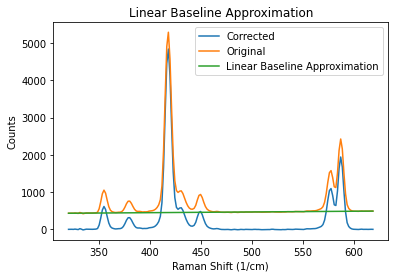

In [110]:
original_spectrum = h2_spectra.copy()
original_windowed_spectrum = original_spectrum[low_window]
original_windowed_spectrum = original_windowed_spectrum[high_window]

corrected_windowed_spectrum, line = correct_baseline(original_spectrum, [320, 620])

plt.plot(corrected_windowed_spectrum[0], corrected_windowed_spectrum[1])
plt.plot(original_windowed_spectrum[0], original_windowed_spectrum[1])
plt.plot(original_windowed_spectrum[0], line)
plt.title('Linear Baseline Approximation')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend(['Corrected', 'Original', 'Linear Baseline Approximation'])

# Peak and Integration Ratios

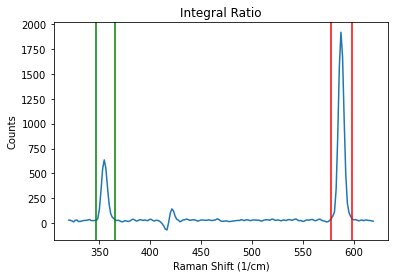

In [106]:
peak_spectrum = windowed_spectrum.copy()

plt.plot(peak_spectrum[0], peak_spectrum[1])
plt.title('Integral Ratio')
plt.xlabel(x_label)
plt.ylabel(y_label)

plt.axvline(x=347, color='g')
plt.axvline(x=365, color='g')

plt.axvline(x=578, color='r')
plt.axvline(x=598, color='r')

In [108]:
peak_spectrum = windowed_spectrum.copy()

para_peak = 0
ortho_peak = 0
para_integration = 0
ortho_integration = 0

for index, row in peak_spectrum.iterrows():
    if row[0] > 347 and row[0] < 365:
        para_peak = max(para_peak, row[1])
        para_integration += row[1]
    if row[0] > 578 and row[0] < 598:
        ortho_peak = max(ortho_peak, row[1])
        ortho_integration += row[1]

print(f'Para peak: {para_peak}')
print(f'Ortho peak: {ortho_peak}')
print(f'Ortho-Para ratio: {ortho_peak / para_peak}')
    
print(f'Para integration: {para_integration}')
print(f'Ortho intergration: {ortho_integration}')
print(f'Ortho-Para integration ratio: {ortho_integration / para_integration}')

Para peak: 636.006923017
Ortho peak: 1916.2105855239997
Ortho-Para ratio: 3.012876929757541
Para integration: 3023.918819271
Ortho intergration: 8456.551904486
Ortho-Para integration ratio: 2.7965538792224214
